In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Preprocessing the indian Male names dataset

In [ ]:
#indian names male
data=pd.read_csv('/content/drive/MyDrive/Datasets/Indian-Male-Names.csv') 

In [ ]:
data

,name,gender,race
0,barjraj,m,indian
1,ramdin verma,m,indian
2,sharat chandran,m,indian
3,birender mandal,m,indian
4,amit,m,indian
...,...,...,...
14840,buddha,m,indian
14841,mukesh,m,indian
14842,monu,m,indian
14843,govind prasad shahu,m,indian


checking null values

In [ ]:
data.isna().sum()

name      24
gender     0
race       0
dtype: int64

checking the name repeations

In [ ]:
data.name.value_counts()

deepak                 135
rahul                  111
rohit                   78
sanjay                  68
raju                    67
                      ... 
yogesh chahar            1
pankaj jina              1
mannulal                 1
govind patel             1
govind prasad shahu      1
Name: name, Length: 8519, dtype: int64

In [ ]:
data.gender.value_counts()

m    14845
Name: gender, dtype: int64

creating a list for storing the first name of the names

In [ ]:
namelist = []

In [ ]:
for names in data['name']:
# processing on names acailable in data.

    first_name = str(names).strip().split(' ')[0]

    namelist.append(first_name)

In [ ]:
len(namelist)

14845

In [ ]:
processed_name_list = []

s = 'abcdefghijklmnopqrstuvwxyz'
# s contains all alphabates a-z.

for i in namelist:
# processing on names acailable in namelist which contains all male and female names .

    i = i.split('@')[0]

    i = i.split('.')[-1]

    i = i.split('-')[-1]

    i = i.strip('`').strip()

    if len(i) > 2:

        for j in i:

            if j in s:
                processed_name_list.append(i)
 

unique_names = set(processed_name_list)
# unique_names contains unique names and removes repeated names.

processed_name_list = sorted(list(unique_names))
# processed_name_list contains list of all names in sorted format.

In [ ]:
processed_name_list_df=pd.DataFrame(processed_name_list)

In [ ]:
processed_name_list_df

,0
0,aabid
1,aadesh
2,aadil
3,aadish
4,aaditya
...,...
3867,zile
3868,zishan
3869,ziyabul
3870,zuhaib


In [ ]:
processed_name_list_df[processed_name_list_df[0]=="deepak"]

,0
775,deepak


In [ ]:
processed_name_list_df.value_counts()

aabid       1
rahil       1
rabpreet    1
rada        1
radat       1
           ..
imtyaz      1
inayat      1
indal       1
inder       1
zuveb       1
Length: 3872, dtype: int64

In [ ]:
df2 = processed_name_list_df

In [ ]:
df2

,0
0,aabid
1,aadesh
2,aadil
3,aadish
4,aaditya
...,...
3867,zile
3868,zishan
3869,ziyabul
3870,zuhaib


In [ ]:
df2.columns=["Name"]

In [ ]:
df2

,Name
0,aabid
1,aadesh
2,aadil
3,aadish
4,aaditya
...,...
3867,zile
3868,zishan
3869,ziyabul
3870,zuhaib


In [ ]:
new=[]

In [ ]:
for i in range(0,len(df2["Name"])):
  ff=any(map(str.isdigit, df2["Name"][i]))
  new.append(ff)

In [ ]:
len(new)

3872

In [ ]:
new1=pd.DataFrame(new)

In [ ]:
new1

,0
0,False
1,False
2,False
3,False
4,False
...,...
3867,False
3868,False
3869,False
3870,False


In [ ]:
new1[0].value_counts()

False    3869
True        3
Name: 0, dtype: int64

In [ ]:
df2.insert(loc=1, column="Bool", value=new1)

In [ ]:
df2

,Name,Bool
0,aabid,False
1,aadesh,False
2,aadil,False
3,aadish,False
4,aaditya,False
...,...,...
3867,zile,False
3868,zishan,False
3869,ziyabul,False
3870,zuhaib,False


checking which names conatins numbers in it

In [ ]:
df2.loc[df2['Bool'] == True]

,Name,Bool
153,al0k,True
2023,moh0,True
3255,shi8vprakash,True


In [ ]:
df2

,Name,Bool
0,aabid,False
1,aadesh,False
2,aadil,False
3,aadish,False
4,aaditya,False
...,...,...
3867,zile,False
3868,zishan,False
3869,ziyabul,False
3870,zuhaib,False


In [ ]:
data_with_index = df2.set_index("Bool")
data_with_index.head()

,Name
Bool,
False,aabid
False,aadesh
False,aadil
False,aadish
False,aaditya


In [ ]:
data_with_index = data_with_index.drop(True)

In [ ]:
df2=data_with_index

In [ ]:
df2

,Name
Bool,
False,aabid
False,aadesh
False,aadil
False,aadish
False,aaditya
...,...
False,zile
False,zishan
False,ziyabul


In [ ]:
# Resetting a dataframe index with .reset_index()
df = df2.reset_index()

In [ ]:
df

,Bool,Name
0,False,aabid
1,False,aadesh
2,False,aadil
3,False,aadish
4,False,aaditya
...,...,...
3864,False,zile
3865,False,zishan
3866,False,ziyabul
3867,False,zuhaib


In [ ]:
df.loc[df['Bool'] == True]

,Bool,Name


In [ ]:
df=df.drop("Bool",axis=1)

In [ ]:
df

,Name
0,aabid
1,aadesh
2,aadil
3,aadish
4,aaditya
...,...
3864,zile
3865,zishan
3866,ziyabul
3867,zuhaib


In [ ]:
df["Name"][143]

'akif'

In [ ]:
df

,Name
0,aabid
1,aadesh
2,aadil
3,aadish
4,aaditya
...,...
3864,zile
3865,zishan
3866,ziyabul
3867,zuhaib


In [ ]:
df

,Name
0,aabid
1,aadesh
2,aadil
3,aadish
4,aaditya
...,...
3864,zile
3865,zishan
3866,ziyabul
3867,zuhaib


checking any spcial characters in the names

In [ ]:
oo=[]

In [ ]:
import re
for i in range(0,len(df["Name"])):
  string = df["Name"][i]

  # check string contains special characters or not
  if(bool(re.match('^[a-zA-Z0-9]*$', string)) == True):
    oo.append(0)  
  else:
    oo.append(1)  

In [ ]:
oo1=pd.DataFrame(oo)

In [ ]:
oo1

,0
0,0
1,0
2,0
3,0
4,0
...,...
3864,0
3865,0
3866,0
3867,0


In [ ]:
oo1.value_counts()

0    3865
1       4
dtype: int64

In [ ]:
df5= df.assign(Bool1=oo1)

In [ ]:
df5

,Name,Bool1
0,aabid,0
1,aadesh,0
2,aadil,0
3,aadish,0
4,aaditya,0
...,...,...
3864,zile,0
3865,zishan,0
3866,ziyabul,0
3867,zuhaib,0


In [ ]:
df5[df5["Bool1"]==1]

,Name,Bool1
189,"amit,",1
2887,s/o,1
2905,sadab(khura),1
3011,sandee[,1


In [ ]:
df5.drop(df5[df5["Bool1"]==1].index , inplace=True)

In [ ]:
df5

,Name,Bool1
0,aabid,0
1,aadesh,0
2,aadil,0
3,aadish,0
4,aaditya,0
...,...,...
3864,zile,0
3865,zishan,0
3866,ziyabul,0
3867,zuhaib,0


dropping the bool1

In [ ]:
df=df5.drop("Bool1",axis=1)

In [ ]:
df

,Name
0,aabid
1,aadesh
2,aadil
3,aadish
4,aaditya
...,...
3864,zile
3865,zishan
3866,ziyabul
3867,zuhaib


In [ ]:
# Resetting a dataframe index with .reset_index()
df6 = df.reset_index()

In [ ]:
df6

,index,Name
0,0,aabid
1,1,aadesh
2,2,aadil
3,3,aadish
4,4,aaditya
...,...,...
3860,3864,zile
3861,3865,zishan
3862,3866,ziyabul
3863,3867,zuhaib


In [ ]:
df=df6.drop("index",axis=1)

In [ ]:
df

,Name
0,aabid
1,aadesh
2,aadil
3,aadish
4,aaditya
...,...
3860,zile
3861,zishan
3862,ziyabul
3863,zuhaib


we know that its all male name so creating a new column named "m"

In [ ]:
n=len(df)

In [ ]:
ss = pd.Series("m", index=range(n))
print(ss)

0       m
1       m
2       m
3       m
4       m
       ..
3860    m
3861    m
3862    m
3863    m
3864    m
Length: 3865, dtype: object


In [ ]:
ss1=pd.DataFrame(ss)

In [ ]:
ss1

,0
0,m
1,m
2,m
3,m
4,m
...,...
3860,m
3861,m
3862,m
3863,m


adding the colmn "m" series column 

In [ ]:
df = df.assign(Gender=ss1)

In [ ]:
df.tail()

,Name,Gender
3860,zile,m
3861,zishan,m
3862,ziyabul,m
3863,zuhaib,m
3864,zuveb,m


In [ ]:
#extracting the names as csv
df.to_csv('pp_indian_male_names.csv')

## Preprocessing the indian Female names dataset

In [ ]:
#indian names female
data=pd.read_csv('/content/drive/MyDrive/Datasets/Indian-Female-Names.csv') 

In [ ]:
data

,name,gender,race
0,shivani,f,indian
1,isha,f,indian
2,smt shyani devi,f,indian
3,divya,f,indian
4,mansi,f,indian
...,...,...,...
15377,saroj devi,f,indian
15378,naina @ geeta,f,indian
15379,manju d/0 baboo lal jatav,f,indian
15380,shivani,f,indian


checking null values

In [ ]:
data.isna().sum()

name      31
gender     0
race       0
dtype: int64

checking the name repeations

In [ ]:
data.name.value_counts()

pooja                  346
jyoti                  198
poonam                 145
sunita                 136
neha                   129
                      ... 
सानिया                   1
sakshi sharma            1
gulafsha                 1
safia khatun mandal      1
nayna                    1
Name: name, Length: 6773, dtype: int64

In [ ]:
data.gender.value_counts()

f    15382
Name: gender, dtype: int64

In [ ]:
data[data['name']=="divya"]

,name,gender,race
3,divya,f,indian
1115,divya,f,indian
1255,divya,f,indian
1982,divya,f,indian
3317,divya,f,indian
4021,divya,f,indian
4316,divya,f,indian
4500,divya,f,indian
4625,divya,f,indian
5414,divya,f,indian


creating a list for storing the first name of the names

In [ ]:
namelist = []

In [ ]:
for names in data['name']:
# processing on names acailable in data.

    first_name = str(names).strip().split(' ')[0]

    namelist.append(first_name)

In [ ]:
len(namelist)

15382

In [ ]:
processed_name_list = []

s = 'abcdefghijklmnopqrstuvwxyz'
# s contains all alphabates a-z.

for i in namelist:
# processing on names acailable in namelist which contains all male and female names .

    i = i.split('@')[0]

    i = i.split('.')[-1]

    i = i.split('-')[-1]

    i = i.strip('`').strip()

    if len(i) > 2:

        for j in i:

            if j in s:
                processed_name_list.append(i)
 

unique_names = set(processed_name_list)
# unique_names contains unique names and removes repeated names.

processed_name_list = sorted(list(unique_names))
# processed_name_list contains list of all names in sorted format.

In [ ]:
processed_name_list_df=pd.DataFrame(processed_name_list)

In [ ]:
processed_name_list_df

,0
0,aabida
1,aachal
2,aafreen
3,aafrin
4,aakanksha
...,...
3107,zeenat
3108,zenab
3109,zhini
3110,zina


In [ ]:
processed_name_list_df[processed_name_list_df[0]=="divya"]

,0
556,divya


In [ ]:
processed_name_list_df.value_counts()

aabida       1
reeta        1
ratmo        1
ratna        1
ratni        1
            ..
kamjeet      1
kamla        1
kamlajeet    1
kamlash      1
zoya         1
Length: 3112, dtype: int64

In [ ]:
df2 = processed_name_list_df

In [ ]:
df2

,0
0,aabida
1,aachal
2,aafreen
3,aafrin
4,aakanksha
...,...
3107,zeenat
3108,zenab
3109,zhini
3110,zina


In [ ]:
df2.columns=["Name"]

In [ ]:
df2

,Name
0,aabida
1,aachal
2,aafreen
3,aafrin
4,aakanksha
...,...
3107,zeenat
3108,zenab
3109,zhini
3110,zina


In [ ]:
new=[]

In [ ]:
for i in range(0,len(df2["Name"])):
  ff=any(map(str.isdigit, df2["Name"][i]))
  new.append(ff)

In [ ]:
len(new)

3112

In [ ]:
new1=pd.DataFrame(new)

In [ ]:
new1

,0
0,False
1,False
2,False
3,False
4,False
...,...
3107,False
3108,False
3109,False
3110,False


In [ ]:
new1[0].value_counts()

False    3111
True        1
Name: 0, dtype: int64

In [ ]:
df2.insert(loc=1, column="Bool", value=new1)

In [ ]:
df2

,Name,Bool
0,aabida,False
1,aachal,False
2,aafreen,False
3,aafrin,False
4,aakanksha,False
...,...,...
3107,zeenat,False
3108,zenab,False
3109,zhini,False
3110,zina,False


checking which names conatins numbers in it

In [ ]:
df2.loc[df2['Bool'] == True]

,Name,Bool
1152,km0,True


In [ ]:
df2

,Name,Bool
0,aabida,False
1,aachal,False
2,aafreen,False
3,aafrin,False
4,aakanksha,False
...,...,...
3107,zeenat,False
3108,zenab,False
3109,zhini,False
3110,zina,False


In [ ]:
data_with_index = df2.set_index("Bool")
data_with_index.head()

,Name
Bool,
False,aabida
False,aachal
False,aafreen
False,aafrin
False,aakanksha


In [ ]:
data_with_index = data_with_index.drop(True)

In [ ]:
df2=data_with_index

In [ ]:
df2

,Name
Bool,
False,aabida
False,aachal
False,aafreen
False,aafrin
False,aakanksha
...,...
False,zeenat
False,zenab
False,zhini


In [ ]:
# Resetting a dataframe index with .reset_index()
df = df2.reset_index()

In [ ]:
df

,Bool,Name
0,False,aabida
1,False,aachal
2,False,aafreen
3,False,aafrin
4,False,aakanksha
...,...,...
3106,False,zeenat
3107,False,zenab
3108,False,zhini
3109,False,zina


In [ ]:
df.loc[df['Bool'] == True]

,Bool,Name


In [ ]:
df=df.drop("Bool",axis=1)

In [ ]:
df

,Name
0,aabida
1,aachal
2,aafreen
3,aafrin
4,aakanksha
...,...
3106,zeenat
3107,zenab
3108,zhini
3109,zina


In [ ]:
df["Name"][143]

'anarkali'

In [ ]:
df

,Name
0,aabida
1,aachal
2,aafreen
3,aafrin
4,aakanksha
...,...
3106,zeenat
3107,zenab
3108,zhini
3109,zina


In [ ]:
df

,Name
0,aabida
1,aachal
2,aafreen
3,aafrin
4,aakanksha
...,...
3106,zeenat
3107,zenab
3108,zhini
3109,zina


checking any spcial characters in the names

In [ ]:
oo=[]

In [ ]:
import re
for i in range(0,len(df["Name"])):
  string = df["Name"][i]

  # check string contains special characters or not
  if(bool(re.match('^[a-zA-Z0-9]*$', string)) == True):
    oo.append(0)  
  else:
    oo.append(1)  

In [ ]:
oo1=pd.DataFrame(oo)

In [ ]:
oo1

,0
0,0
1,0
2,0
3,0
4,0
...,...
3106,0
3107,0
3108,0
3109,0


In [ ]:
oo1.value_counts()

0    3100
1      11
dtype: int64

In [ ]:
df5= df.assign(Bool1=oo1)

In [ ]:
df5

,Name,Bool1
0,aabida,0
1,aachal,0
2,aafreen,0
3,aafrin,0
4,aakanksha,0
...,...,...
3106,zeenat,0
3107,zenab,0
3108,zhini,0
3109,zina,0


In [ ]:
df5[df5["Bool1"]==1]

,Name,Bool1
1147,kismat/,1
1862,pooja/varsha,1
1940,puspa&,1
1951,rachna(with,1
2004,"raju,",1
2127,rina/,1
2451,"savita,",1
2552,shakuntla/baby,1
2718,"smt,",1
2748,"soniya,",1


In [ ]:
df5.drop(df5[df5["Bool1"]==1].index , inplace=True)

In [ ]:
df5

,Name,Bool1
0,aabida,0
1,aachal,0
2,aafreen,0
3,aafrin,0
4,aakanksha,0
...,...,...
3106,zeenat,0
3107,zenab,0
3108,zhini,0
3109,zina,0


In [ ]:
df5.Bool1.value_counts()

0    3100
Name: Bool1, dtype: int64

dropping the bool1

In [ ]:
df=df5.drop("Bool1",axis=1)

In [ ]:
df

,Name
0,aabida
1,aachal
2,aafreen
3,aafrin
4,aakanksha
...,...
3106,zeenat
3107,zenab
3108,zhini
3109,zina


In [ ]:
# Resetting a dataframe index with .reset_index()
df6 = df.reset_index()

In [ ]:
df6

,index,Name
0,0,aabida
1,1,aachal
2,2,aafreen
3,3,aafrin
4,4,aakanksha
...,...,...
3095,3106,zeenat
3096,3107,zenab
3097,3108,zhini
3098,3109,zina


In [ ]:
df=df6.drop("index",axis=1)

In [ ]:
df

,Name
0,aabida
1,aachal
2,aafreen
3,aafrin
4,aakanksha
...,...
3095,zeenat
3096,zenab
3097,zhini
3098,zina


we know that its all female names so creating a new column named "f"

In [ ]:
n=len(df)

In [ ]:
ss = pd.Series("f", index=range(n))
print(ss)

0       f
1       f
2       f
3       f
4       f
       ..
3095    f
3096    f
3097    f
3098    f
3099    f
Length: 3100, dtype: object


In [ ]:
ss1=pd.DataFrame(ss)

In [ ]:
ss1

,0
0,f
1,f
2,f
3,f
4,f
...,...
3095,f
3096,f
3097,f
3098,f


adding the colmn "m" series column 

In [ ]:
df = df.assign(Gender=ss1)

In [ ]:
df.tail()

,Name,Gender
3095,zeenat,f
3096,zenab,f
3097,zhini,f
3098,zina,f
3099,zoya,f


In [ ]:
#extracting the names as csv
df.to_csv('pp_indian_female_names.csv')

## Adding the two csv files into one

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
male=pd.read_csv("/content/pp_indian_male_names.csv",index_col=0)
female=pd.read_csv("/content/pp_indian_female_names.csv",index_col=0)

In [ ]:
male

,Name,Gender
0,aabid,m
1,aadesh,m
2,aadil,m
3,aadish,m
4,aaditya,m
...,...,...
3860,zile,m
3861,zishan,m
3862,ziyabul,m
3863,zuhaib,m


In [ ]:
female

,Name,Gender
0,aabida,f
1,aachal,f
2,aafreen,f
3,aafrin,f
4,aakanksha,f
...,...,...
3095,zeenat,f
3096,zenab,f
3097,zhini,f
3098,zina,f


In [ ]:
len(male),len(female)

(3865, 3100)

In [ ]:
#main code foe combine
import pandas as pd

pd.concat([male, female]).to_csv('pp_indian_names.csv', index=False)

## Preprocess the combined csv

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv("/content/pp_indian_names.csv")

In [ ]:
df

,Name,Gender
0,aabid,m
1,aadesh,m
2,aadil,m
3,aadish,m
4,aaditya,m
...,...,...
6960,zeenat,f
6961,zenab,f
6962,zhini,f
6963,zina,f


In [ ]:
df["Name"].value_counts()

vijay            2
parmjeet         2
mohini           2
dinesh           2
vijeta           2
                ..
nitin            1
nithyanandham    1
nitesh           1
nishith          1
zoya             1
Name: Name, Length: 6466, dtype: int64

above here we can see that same name contains both male and female

In [ ]:
df["Gender"].value_counts()

m    3865
f    3100
Name: Gender, dtype: int64

In [ ]:
df[df["Name"]=="goldy"]

,Name,Gender
1065,goldy,m
4555,goldy,f


shuffling the dataframe so that i can keep the name male or female 

In [ ]:
df_shuffle = df.sample(frac = 1)

In [ ]:
df_shuffle

,Name,Gender
6280,sarshwati,f
2389,pardep,m
4494,firoja,f
2081,mujibu,m
538,bhramanand,m
...,...,...
5886,ramila,f
6163,sajni,f
1403,jameer,m
4263,bohati,f


In [ ]:
# Resetting a dataframe index with .reset_index()
df = df_shuffle.reset_index()

In [ ]:
df

,index,Name,Gender
0,6280,sarshwati,f
1,2389,pardep,m
2,4494,firoja,f
3,2081,mujibu,m
4,538,bhramanand,m
...,...,...,...
6960,5886,ramila,f
6961,6163,sajni,f
6962,1403,jameer,m
6963,4263,bohati,f


In [ ]:
df=df.drop("index",axis=1)

In [ ]:
df

,Name,Gender
0,sarshwati,f
1,pardep,m
2,firoja,f
3,mujibu,m
4,bhramanand,m
...,...,...
6960,ramila,f
6961,sajni,f
6962,jameer,m
6963,bohati,f


so i'm going to keep the first occurance of the name maybe its male or female

In [ ]:
df[df["Name"]=="goldy"]

,Name,Gender
1035,goldy,f
5794,goldy,m


In [ ]:
df_f = df.drop_duplicates(subset='Name', keep='first')

In [ ]:
df_f[df_f["Name"]=="goldy"]

,Name,Gender
1035,goldy,f


In [ ]:
df_f

,Name,Gender
0,sarshwati,f
1,pardep,m
2,firoja,f
3,mujibu,m
4,bhramanand,m
...,...,...
6960,ramila,f
6961,sajni,f
6962,jameer,m
6963,bohati,f


In [ ]:
df=df_f

In [ ]:
df

,Name,Gender
0,sarshwati,f
1,pardep,m
2,firoja,f
3,mujibu,m
4,bhramanand,m
...,...,...
6960,ramila,f
6961,sajni,f
6962,jameer,m
6963,bohati,f


In [ ]:
# Resetting a dataframe index with .reset_index()
df = df.reset_index()

In [ ]:
df

,index,Name,Gender
0,0,sarshwati,f
1,1,pardep,m
2,2,firoja,f
3,3,mujibu,m
4,4,bhramanand,m
...,...,...,...
6462,6960,ramila,f
6463,6961,sajni,f
6464,6962,jameer,m
6465,6963,bohati,f


In [ ]:
df=df.drop("index",axis=1)

In [ ]:
df

,Name,Gender
0,sarshwati,f
1,pardep,m
2,firoja,f
3,mujibu,m
4,bhramanand,m
...,...,...
6462,ramila,f
6463,sajni,f
6464,jameer,m
6465,bohati,f


In [ ]:
len(df[df.Gender == "m"])

3606

In [ ]:
len(df[df.Gender == "f"])

2861

(array([2861.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        3606.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

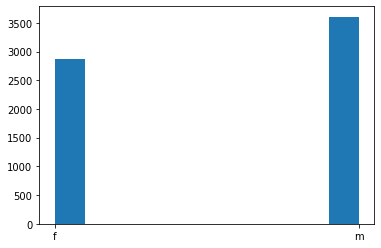

In [ ]:
plt.hist(df.Gender)

In [ ]:
#extracting the names as csv
df.to_csv('final_indiannames.csv')

## Deep learning

### Changing the object to numerical

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv("/content/final_indiannames.csv",index_col=0)

In [ ]:
df

,Name,Gender
0,sarshwati,f
1,pardep,m
2,firoja,f
3,mujibu,m
4,bhramanand,m
...,...,...
6462,ramila,f
6463,sajni,f
6464,jameer,m
6465,bohati,f


In [ ]:
df.isna().sum()

Name      1
Gender    0
dtype: int64

In [ ]:
df=df.dropna(axis = 0, how ='any')

In [ ]:
df.isna().sum()

Name      0
Gender    0
dtype: int64

In [ ]:
# Resetting a dataframe index with .reset_index()
df = df.reset_index()

In [ ]:
df

,index,Name,Gender
0,0,sarshwati,f
1,1,pardep,m
2,2,firoja,f
3,3,mujibu,m
4,4,bhramanand,m
...,...,...,...
6461,6462,ramila,f
6462,6463,sajni,f
6463,6464,jameer,m
6464,6465,bohati,f


In [ ]:
df=df.drop("index",axis=1)

In [ ]:
df

,Name,Gender
0,sarshwati,f
1,pardep,m
2,firoja,f
3,mujibu,m
4,bhramanand,m
...,...,...
6461,ramila,f
6462,sajni,f
6463,jameer,m
6464,bohati,f


In [ ]:
df['Gender']=df['Gender'].astype('category').cat.codes

In [ ]:
df

,Name,Gender
0,sarshwati,0
1,pardep,1
2,firoja,0
3,mujibu,1
4,bhramanand,1
...,...,...
6461,ramila,0
6462,sajni,0
6463,jameer,1
6464,bohati,0


In [ ]:
df[df["Name"]=="sagar"]

,Name,Gender
2035,sagar,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6466 entries, 0 to 6465
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    6466 non-null   object
 1   Gender  6466 non-null   int8  
dtypes: int8(1), object(1)
memory usage: 57.0+ KB


### Assinging the alphabets

In [ ]:
import string
letters=list(string.ascii_lowercase)

In [ ]:
vocab=dict(zip(letters,range(1,27)))

In [ ]:
#create a reverse vocab
r_vocab=dict(zip(range(1,27),letters))

In [ ]:
df

,Name,Gender
0,sarshwati,0
1,pardep,1
2,firoja,0
3,mujibu,1
4,bhramanand,1
...,...,...
6461,ramila,0
6462,sajni,0
6463,jameer,1
6464,bohati,0


In [ ]:
df['Name'][143]

'kawaljeet'

In [ ]:
def word_to_number():
  for i in range(0,df.shape[0]):
    seq=[vocab[letters.lower()] for letters in df['Name'][i]]
    df['Name'][i]=seq

In [ ]:
word_to_number()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
df.head(20)

,Name,Gender
0,"[19, 1, 18, 19, 8, 23, 1, 20, 9]",0
1,"[16, 1, 18, 4, 5, 16]",1
2,"[6, 9, 18, 15, 10, 1]",0
3,"[13, 21, 10, 9, 2, 21]",1
4,"[2, 8, 18, 1, 13, 1, 14, 1, 14, 4]",1
5,"[3, 8, 5, 20, 20, 1, 14]",1
6,"[11, 1, 14, 15, 11]",1
7,"[1, 13, 1, 18]",1
8,"[13, 1, 21, 19, 1, 13]",0
9,"[8, 9, 18, 1]",0


In [ ]:
df.tail(20)

,Name,Gender
6446,"[10, 15, 25, 20, 9]",0
6447,"[13, 5, 5, 20, 21]",0
6448,"[12, 1, 4, 1]",0
6449,"[19, 8, 17, 1, 11, 21, 14, 20, 12, 1]",0
6450,"[18, 1, 10, 19, 8, 18, 5, 5]",0
6451,"[11, 5, 19, 1, 18]",0
6452,"[8, 1, 19, 9, 2, 21, 12]",1
6453,"[13, 5, 8, 18, 21, 4, 4, 9, 14]",1
6454,"[21, 18, 22, 1, 18, 19, 8, 9]",0
6455,"[25, 1, 20, 9, 14]",1


In [ ]:
df[df['Gender']==1].tail()

,Name,Gender
6452,"[8, 1, 19, 9, 2, 21, 12]",1
6453,"[13, 5, 8, 18, 21, 4, 4, 9, 14]",1
6455,"[25, 1, 20, 9, 14]",1
6458,"[18, 1, 10, 5, 14, 4, 18, 1]",1
6463,"[10, 1, 13, 5, 5, 18]",1


In [ ]:
df[df['Gender']==0].tail()

,Name,Gender
6460,"[8, 21, 19, 5, 14, 9]",0
6461,"[18, 1, 13, 9, 12, 1]",0
6462,"[19, 1, 10, 14, 9]",0
6464,"[2, 15, 8, 1, 20, 9]",0
6465,"[19, 1, 9, 4, 1]",0


In [ ]:
x=df['Name'].values
y=df['Gender'].values

In [ ]:
name_length=[len(x[i]) for i in range(0,df.shape[0])]


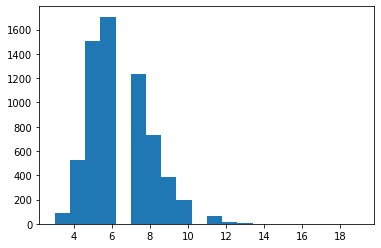

In [ ]:
plt.hist(name_length,bins=20)
plt.show()


### RNN model

In [ ]:
df

,Name,Gender
0,"[19, 1, 18, 19, 8, 23, 1, 20, 9]",0
1,"[16, 1, 18, 4, 5, 16]",1
2,"[6, 9, 18, 15, 10, 1]",0
3,"[13, 21, 10, 9, 2, 21]",1
4,"[2, 8, 18, 1, 13, 1, 14, 1, 14, 4]",1
...,...,...
6461,"[18, 1, 13, 9, 12, 1]",0
6462,"[19, 1, 10, 14, 9]",0
6463,"[10, 1, 13, 5, 5, 18]",1
6464,"[2, 15, 8, 1, 20, 9]",0


In [ ]:
#make the sequence to same length we have to pad it with zeros at beginning
from keras.preprocessing.sequence import pad_sequences
x=pad_sequences(df['Name'].values,maxlen=15,padding='pre')

In [ ]:
df['Name'][0]

[19, 1, 18, 19, 8, 23, 1, 20, 9]

In [ ]:
x[0]

array([ 0,  0,  0,  0,  0,  0, 19,  1, 18, 19,  8, 23,  1, 20,  9],
      dtype=int32)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y,
    test_size=0.2, shuffle = True, random_state = 8)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, 
    test_size=0.25, random_state= 8) # 0.25 x 0.8 = 0.2

In [ ]:
print("X_train shape: {}".format(X_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("X_val shape: {}".format(X_val.shape))
print("y_train shape: {}".format(y_train.shape))
print("y_test shape: {}".format(y_test.shape))

print("y val shape: {}".format(y_val.shape))

X_train shape: (3879, 15)
X_test shape: (1294, 15)
X_val shape: (1293, 15)
y_train shape: (3879,)
y_test shape: (1294,)
y val shape: (1293,)


In [ ]:
#build the model
from keras.layers import Input,Embedding,Dense,LSTM
from keras.models import Model
vocab_size=len(vocab)+1
input=Input(shape=(15,))
emn=Embedding(input_dim=vocab_size,output_dim=5)(input)
lstm1=LSTM(units=32,return_sequences=True)(emn)
lstm2=LSTM(units=64)(lstm1)
out=Dense(units=1,activation='sigmoid')(lstm2)
my_model=Model(inputs=input,outputs=out)

In [ ]:
my_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 15)]              0         
                                                                 
 embedding (Embedding)       (None, 15, 5)             135       
                                                                 
 lstm (LSTM)                 (None, 15, 32)            4864      
                                                                 
 lstm_1 (LSTM)               (None, 64)                24832     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 29,896
Trainable params: 29,896
Non-trainable params: 0
_________________________________________________________________


In [ ]:
my_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
3879 //32

121

In [ ]:
my_model.fit(X_train ,y_train,epochs=100,validation_data=(X_val,y_val),shuffle=True)

Epoch 1/100
122/122 [==============================] - 5s 43ms/step - loss: 0.0930 - accuracy: 0.9709 - val_loss: 0.8347 - val_accuracy: 0.7370
Epoch 2/100
122/122 [==============================] - 3s 29ms/step - loss: 0.0941 - accuracy: 0.9688 - val_loss: 0.8547 - val_accuracy: 0.7262
Epoch 3/100
122/122 [==============================] - 2s 18ms/step - loss: 0.0862 - accuracy: 0.9755 - val_loss: 0.8609 - val_accuracy: 0.7340
Epoch 4/100
122/122 [==============================] - 2s 18ms/step - loss: 0.0801 - accuracy: 0.9768 - val_loss: 0.8855 - val_accuracy: 0.7533
Epoch 5/100
122/122 [==============================] - 2s 18ms/step - loss: 0.0764 - accuracy: 0.9791 - val_loss: 0.8954 - val_accuracy: 0.7463
Epoch 6/100
122/122 [==============================] - 2s 18ms/step - loss: 0.0724 - accuracy: 0.9776 - val_loss: 0.8989 - val_accuracy: 0.7363
Epoch 7/100
122/122 [==============================] - 2s 18ms/step - loss: 0.0675 - accuracy: 0.9822 - val_loss: 0.9138 - val_accuracy:

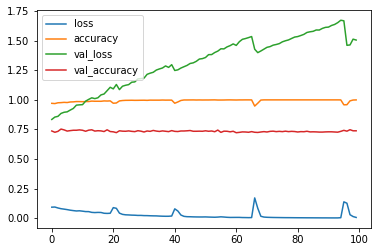

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
pd.DataFrame(my_model.history.history).plot()

In [ ]:
y_pred = my_model.predict(X_test)

In [ ]:
threshold = 0.5
y_final = np.where(y_pred > threshold, 1,0)

In [ ]:
np.unique(y_final)

array([0, 1])

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import numpy as np

In [ ]:
confusion_matrix(y_test,y_final)

array([[398, 168],
       [163, 565]])

In [ ]:
print(classification_report(y_test,y_final))

              precision    recall  f1-score   support

           0       0.71      0.70      0.71       566
           1       0.77      0.78      0.77       728

    accuracy                           0.74      1294
   macro avg       0.74      0.74      0.74      1294
weighted avg       0.74      0.74      0.74      1294



### Predciton from input

In [ ]:
name='preethi'
test_name=name.lower()
seq=[vocab[i] for i in test_name]
x_test=pad_sequences([seq],15)
x_test

array([[ 0,  0,  0,  0,  0,  0,  0,  0, 16, 18,  5,  5, 20,  8,  9]],
      dtype=int32)

In [ ]:
y_pred=my_model.predict(x_test)
if(y_pred>0.5):
  print("Male")
else:
  print("Female")
  print(y_pred)

Female
[[0.00598764]]


### Predciton in the dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv("/content/final_indiannames.csv",index_col=0)

In [ ]:
df

,Name,Gender
0,sarshwati,f
1,pardep,m
2,firoja,f
3,mujibu,m
4,bhramanand,m
...,...,...
6462,ramila,f
6463,sajni,f
6464,jameer,m
6465,bohati,f


In [ ]:
df.isna().sum()

Name      1
Gender    0
dtype: int64

In [ ]:
df=df.dropna(axis = 0, how ='any')

In [ ]:
df.isna().sum()

Name      0
Gender    0
dtype: int64

In [ ]:
# Resetting a dataframe index with .reset_index()
df = df.reset_index()

In [ ]:
df

,index,Name,Gender
0,0,sarshwati,f
1,1,pardep,m
2,2,firoja,f
3,3,mujibu,m
4,4,bhramanand,m
...,...,...,...
6461,6462,ramila,f
6462,6463,sajni,f
6463,6464,jameer,m
6464,6465,bohati,f


In [ ]:
df=df.drop("index",axis=1)

In [ ]:
df

,Name,Gender
0,sarshwati,f
1,pardep,m
2,firoja,f
3,mujibu,m
4,bhramanand,m
...,...,...
6461,ramila,f
6462,sajni,f
6463,jameer,m
6464,bohati,f


In [ ]:
df['Gender']=df['Gender'].astype('category').cat.codes

In [ ]:
df

,Name,Gender
0,sarshwati,0
1,pardep,1
2,firoja,0
3,mujibu,1
4,bhramanand,1
...,...,...
6461,ramila,0
6462,sajni,0
6463,jameer,1
6464,bohati,0


In [ ]:
#extracting the names as csv
df.to_csv('pp_indian_names_1_0.csv')

In [ ]:
data=pd.read_csv('/content/pp_indian_names_1_0.csv',index_col=0)
data1=pd.read_csv('/content/pp_indian_names_1_0.csv',index_col=0)

In [ ]:
data

,Name,Gender
0,sarshwati,0
1,pardep,1
2,firoja,0
3,mujibu,1
4,bhramanand,1
...,...,...
6461,ramila,0
6462,sajni,0
6463,jameer,1
6464,bohati,0


In [ ]:
data1

,Name,Gender
0,sarshwati,0
1,pardep,1
2,firoja,0
3,mujibu,1
4,bhramanand,1
...,...,...
6461,ramila,0
6462,sajni,0
6463,jameer,1
6464,bohati,0


In [ ]:
for i in range(0,data.shape[0]):
    seq=[vocab[letters.lower()] for letters in data['Name'][i]]
    data['Name'][i]=seq

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
data2 = data.assign(Numbers=data1['Name'])

In [ ]:
data2

,Name,Gender,Numbers
0,"[19, 1, 18, 19, 8, 23, 1, 20, 9]",0,sarshwati
1,"[16, 1, 18, 4, 5, 16]",1,pardep
2,"[6, 9, 18, 15, 10, 1]",0,firoja
3,"[13, 21, 10, 9, 2, 21]",1,mujibu
4,"[2, 8, 18, 1, 13, 1, 14, 1, 14, 4]",1,bhramanand
...,...,...,...
6461,"[18, 1, 13, 9, 12, 1]",0,ramila
6462,"[19, 1, 10, 14, 9]",0,sajni
6463,"[10, 1, 13, 5, 5, 18]",1,jameer
6464,"[2, 15, 8, 1, 20, 9]",0,bohati


In [ ]:
data2.columns=["Numbers","Gender","Name"]

In [ ]:
data2

,Numbers,Gender,Name
0,"[19, 1, 18, 19, 8, 23, 1, 20, 9]",0,sarshwati
1,"[16, 1, 18, 4, 5, 16]",1,pardep
2,"[6, 9, 18, 15, 10, 1]",0,firoja
3,"[13, 21, 10, 9, 2, 21]",1,mujibu
4,"[2, 8, 18, 1, 13, 1, 14, 1, 14, 4]",1,bhramanand
...,...,...,...
6461,"[18, 1, 13, 9, 12, 1]",0,ramila
6462,"[19, 1, 10, 14, 9]",0,sajni
6463,"[10, 1, 13, 5, 5, 18]",1,jameer
6464,"[2, 15, 8, 1, 20, 9]",0,bohati


In [ ]:
data2["Numbers"][1]

[16, 1, 18, 4, 5, 16]

In [ ]:
tt=[]

In [ ]:
for i in range(0,len(data2["Numbers"])):
  rr1=pad_sequences([data2["Numbers"][i]],15)
  y_pred=my_model.predict(rr1)
  if(y_pred>0.5):
    tt.append(1)
  else:
    tt.append(0)

In [ ]:
len(tt)

6466

In [ ]:
tt1=pd.DataFrame(tt)

In [ ]:
tt1

,0
0,0
1,1
2,0
3,1
4,1
...,...
6461,0
6462,0
6463,1
6464,0


In [ ]:
data2 = data2.assign(Predicted=tt1)

In [ ]:
data2

,Numbers,Gender,Name,Predicted
0,"[19, 1, 18, 19, 8, 23, 1, 20, 9]",0,sarshwati,0
1,"[16, 1, 18, 4, 5, 16]",1,pardep,1
2,"[6, 9, 18, 15, 10, 1]",0,firoja,0
3,"[13, 21, 10, 9, 2, 21]",1,mujibu,1
4,"[2, 8, 18, 1, 13, 1, 14, 1, 14, 4]",1,bhramanand,1
...,...,...,...,...
6461,"[18, 1, 13, 9, 12, 1]",0,ramila,0
6462,"[19, 1, 10, 14, 9]",0,sajni,0
6463,"[10, 1, 13, 5, 5, 18]",1,jameer,1
6464,"[2, 15, 8, 1, 20, 9]",0,bohati,0


In [ ]:
data2[(data2['Gender'] == 1) & (data2['Predicted']==0)]

,Numbers,Gender,Name,Predicted
14,"[11, 13, 12, 5, 19]",1,kmles,0
69,"[21, 13, 1, 19, 8, 1, 14, 11, 5, 18]",1,umashanker,0
84,"[14, 1, 10, 18, 5]",1,najre,0
150,"[11, 1, 13, 12, 1]",1,kamla,0
161,"[2, 8, 5, 5, 13, 1]",1,bheema,0
...,...,...,...,...
6396,"[19, 1, 13, 5, 5, 18]",1,sameer,0
6404,"[11, 14, 8, 5, 25, 1, 12, 1, 12]",1,knheyalal,0
6421,"[19, 1, 23, 1, 12, 9]",1,sawali,0
6427,"[1, 19, 8, 1, 18, 1, 13]",1,asharam,0


so here only 339 where predcited female but its male name

In [ ]:
data2[(data2['Gender'] == 0) & (data2['Predicted']==1)]

,Numbers,Gender,Name,Predicted
17,"[19, 9, 20, 1, 18, 1]",0,sitara,1
52,"[1, 19, 13, 1, 14]",0,asman,1
58,"[10, 1, 14, 9, 4]",0,janid,1
60,"[18, 1, 10, 12]",0,rajl,1
70,"[1, 1, 18, 9, 6]",0,aarif,1
...,...,...,...,...
6418,"[19, 21, 19, 18, 9]",0,susri,1
6424,"[6, 15, 18, 14, 20, 1]",0,fornta,1
6447,"[13, 5, 5, 20, 21]",0,meetu,1
6450,"[18, 1, 10, 19, 8, 18, 5, 5]",0,rajshree,1


so here only 330 where predcited male but its female name